In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# for scaling
from sklearn.preprocessing import MinMaxScaler

# for layers and RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
dataset_train  = pd.read_csv('/content/OBEROIRLTY.NS Training.csv')
training_set = dataset_train.iloc[ :, 1:2]
training_set = np.array(training_set)

In [ ]:
training_set

array([[494.649994],
       [488.      ],
       [496.600006],
       ...,
       [840.      ],
       [841.200012],
       [850.900024]])

## Feature scaling:
Now that we have feature we want it to be scaled.

Either we can perform standardization or normalization

In [ ]:
scaling = MinMaxScaler(feature_range = (0,1))
scaled_trset = scaling.fit_transform(training_set)

In [ ]:
scaled_trset

array([[0.25524945],
       [0.24670904],
       [0.2577538 ],
       ...,
       [0.69877348],
       [0.70031462],
       [0.71277209]])

In [ ]:
train_x = []
train_y = []

for i in range(60, 1182):
  train_x.append(scaled_trset[i-60:i,0])
  train_y.append(scaled_trset[i, 0])
x_train, y_train = np.array(train_x), np.array(train_y)


in the above snipet, 

y_train gives the array of values of stock on every 60th day. 

x_train gives the stock price from every 1 to 59 th day 

In [ ]:
y_train

array([0.27175238, 0.26789956, 0.27496307, ..., 0.68978356, 0.69877348,
       0.70031462])

In [ ]:
# now we have to add a dimesion called units that is the number of predictors we can have to predict the stock price
# anytime we want to add a dimension in the numpy array we use the reshape function

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# building the RNN

regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# second LSTM layer 
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# 3rd LSTM layer 
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# 4th LSTM layer 
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
# making the prediction 
regressor.add(Dense(units = 1))

# compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fitting the model 
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
36/36 [==============================] - 15s 131ms/step - loss: 0.1071
Epoch 2/100
36/36 [==============================] - 6s 165ms/step - loss: 0.0573
Epoch 3/100
36/36 [==============================] - 5s 128ms/step - loss: 0.0106
Epoch 4/100
36/36 [==============================] - 5s 130ms/step - loss: 0.0064
Epoch 5/100
36/36 [==============================] - 6s 172ms/step - loss: 0.0059
Epoch 6/100
36/36 [==============================] - 5s 137ms/step - loss: 0.0059
Epoch 7/100
36/36 [==============================] - 6s 167ms/step - loss: 0.0060
Epoch 8/100
36/36 [==============================] - 5s 143ms/step - loss: 0.0061
Epoch 9/100
36/36 [==============================] - 6s 167ms/step - loss: 0.0057
Epoch 10/100
36/36 [==============================] - 5s 143ms/step - loss: 0.0060
Epoch 11/100
36/36 [==============================] - 5s 143ms/step - loss: 0.0055
Epoch 12/100
36/36 [==============================] - 6s 178ms/step - loss: 0.0057
Epoch 13/100

In [ ]:
# Part 2 
# Predicting the REIT price testing on the test set 

dataset_test = pd.read_csv('/content/OBEROIRLTY.NS Test.csv')
dataset_test.dropna(inplace=True)
REIT_price = dataset_test.iloc[:, 1:2].values

# getting the predicted price 
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)- len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaling.transform(inputs)

test_x = []

for i in range(60, 110):
  test_x.append(inputs[i-60:i,0])
test_x = np.array(test_x)


test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))


In [ ]:
predicted_reit_price = regressor.predict(test_x)
predicted_reit_price = scaling.inverse_transform(predicted_reit_price)

2/2 [==============================] - 0s 49ms/step


In [ ]:
predicted_reit_price

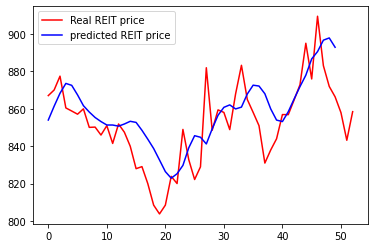

In [ ]:
plt.plot(REIT_price, color='red', label='Real REIT price')
plt.plot(predicted_reit_price, color='blue', label='predicted REIT price')
plt.title = 'OBEROI REIT price(trend) prediction'
plt.xlabel = 'Date (time)'
plt.ylabel = 'Price of REIT'
plt.legend()
plt.show()